In [1]:
import cv2, os, glob
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_yen

In [ ]:
#Step 1: split into images

#find videos
print(f'Current directory: {os.getcwd()}')

path_to_videos = glob.glob(os.path.join('Videos','*.avi'))
print(path_to_videos, '-'*10, sep = '\n')
#create required directories
def makefolders(path):
    folder = os.path.split(path) #create folders for extracting all images
    folder = os.path.splitext(folder[-1])
    folder_create = os.path.join('Videos',folder[0])
    if os.path.exists(folder_create) == False:
        os.mkdir(folder_create)
    else:
        pass
    return folder_create

#navigate into folder for the image and save images
def saveimages(path, dir_name):
    cam = cv2.VideoCapture(path) #access the video. Idk how this actually works
    count, success = 0, True
    while success:
        success, image = cam.read() #access next image of the video
        if not cam.isOpened():
            print(f"Error: Could not open video file {path}")
        os.chdir(dir_name) #change directory so that it saves into the directory that we want to save into
        if success:
            folder = os.path.split(dir_name)
            if os.path.exists(f'{folder[-1]}_frame_{count:02}.jpg') == False:
                cv2.imwrite(f'{folder[-1]}_frame_{count:02}.jpg', image)
                count+=1
            else:
                print(f'Image {folder[-1]}_frame_{count:02}.jpg already exists, skipping save')
                count+=1
        else:
            print('Image failed to save')
        os.chdir(os.path.join('..','..'))
    cam.release()
    print(f'Current directory: {os.getcwd()} \n Completed {path}\n--------------------')

In [ ]:
#this extracts images by calling the functions defined above
for path in path_to_videos:
    dir_name = makefolders(path)
    saveimages(path, dir_name)

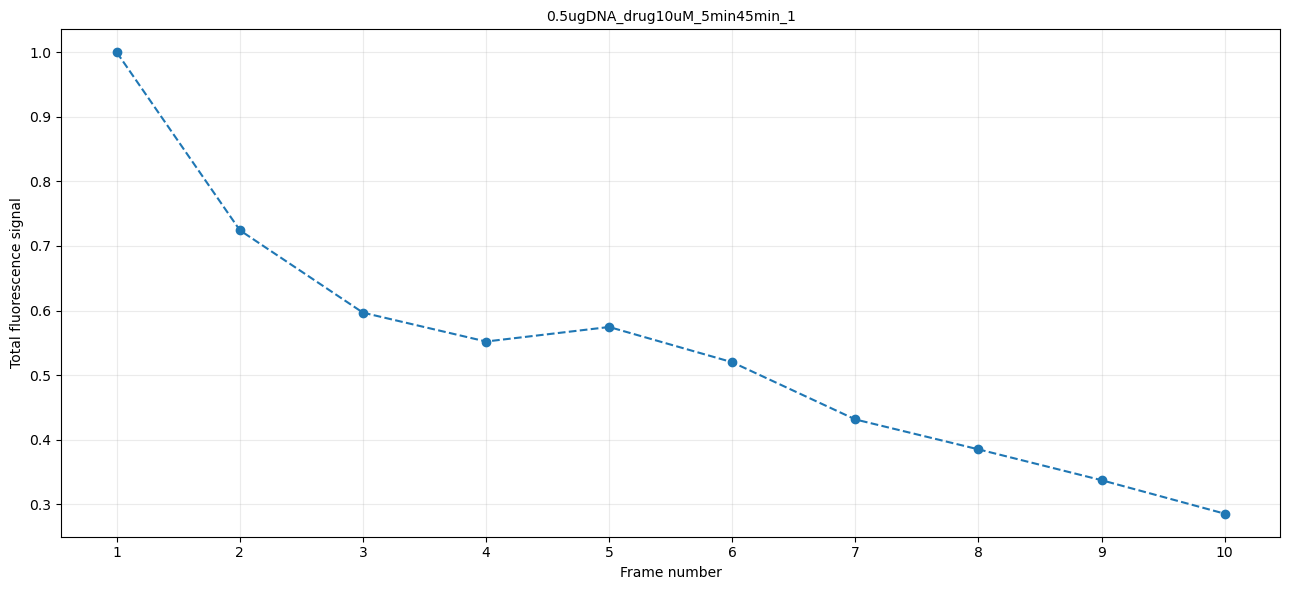

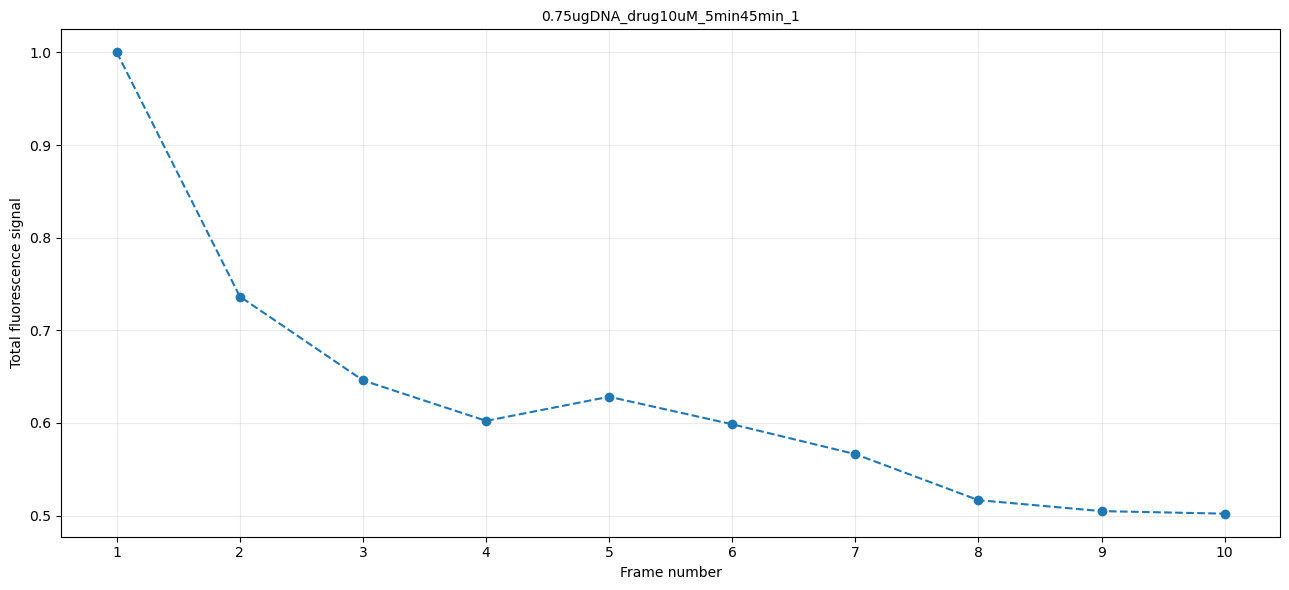

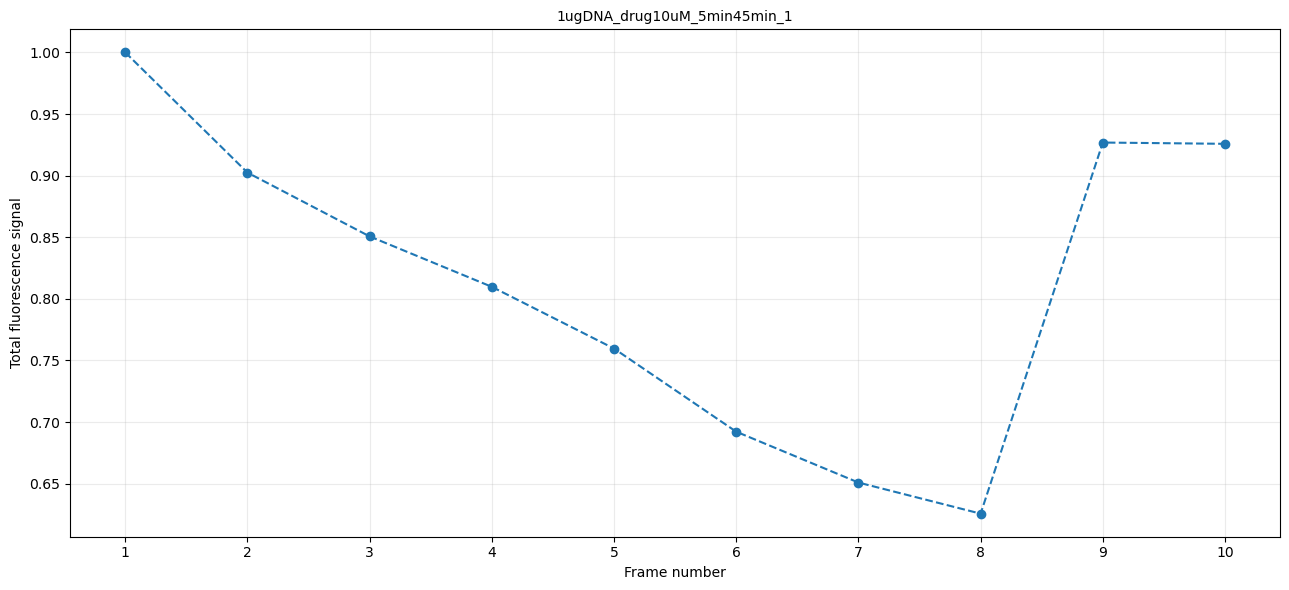

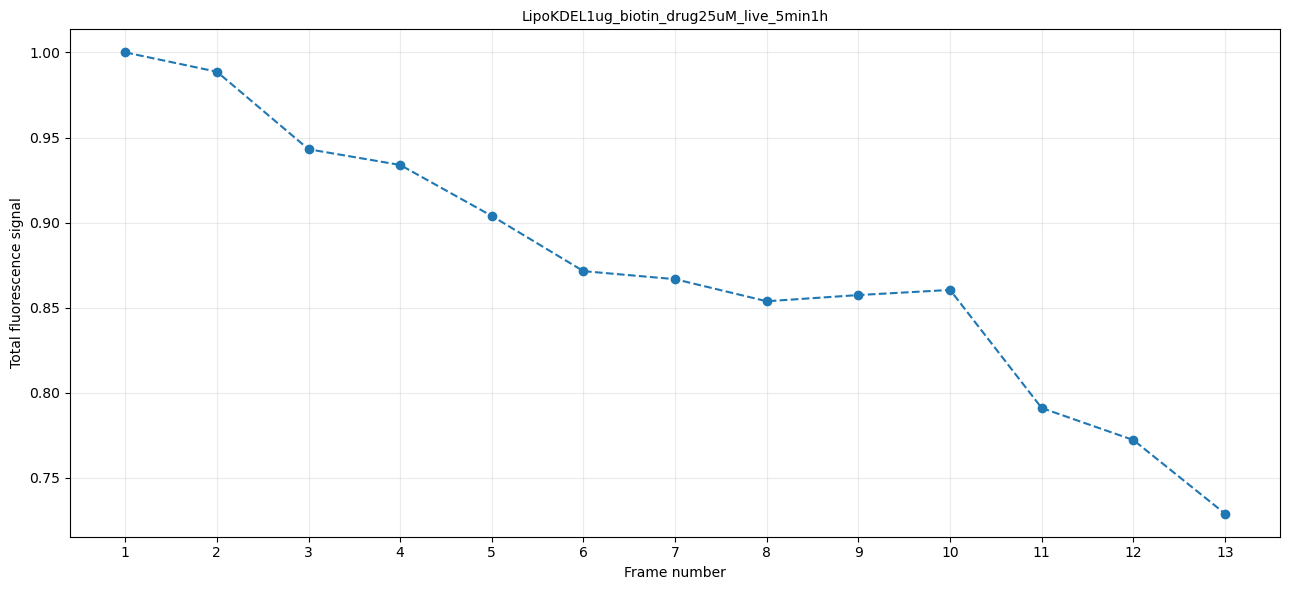

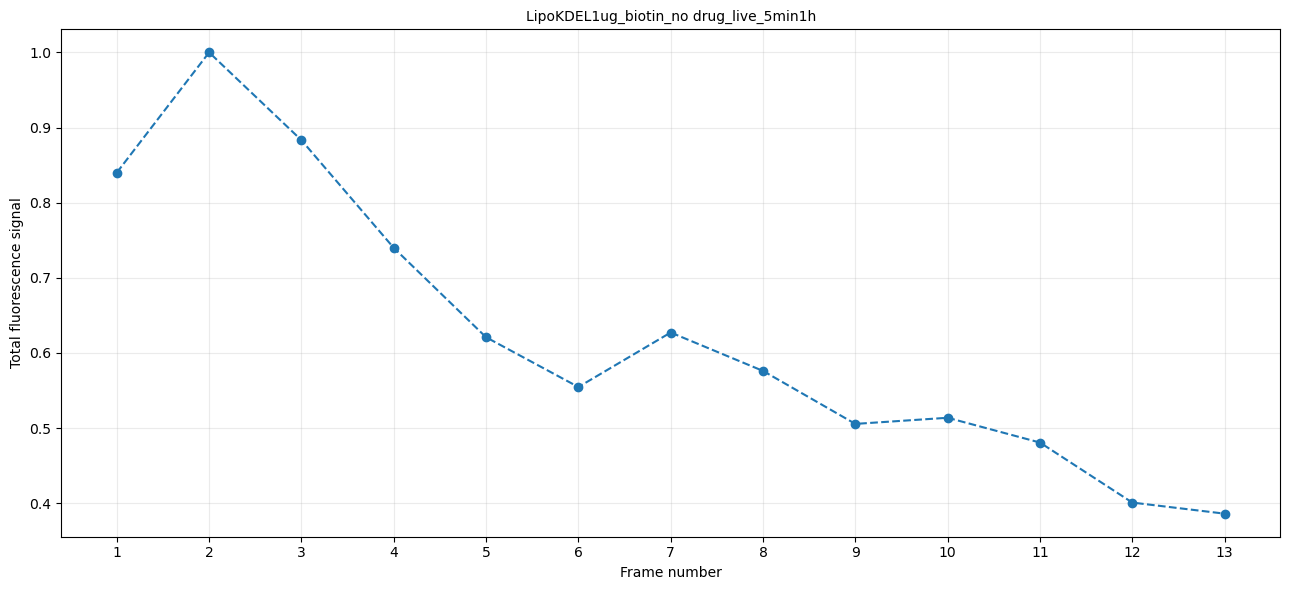

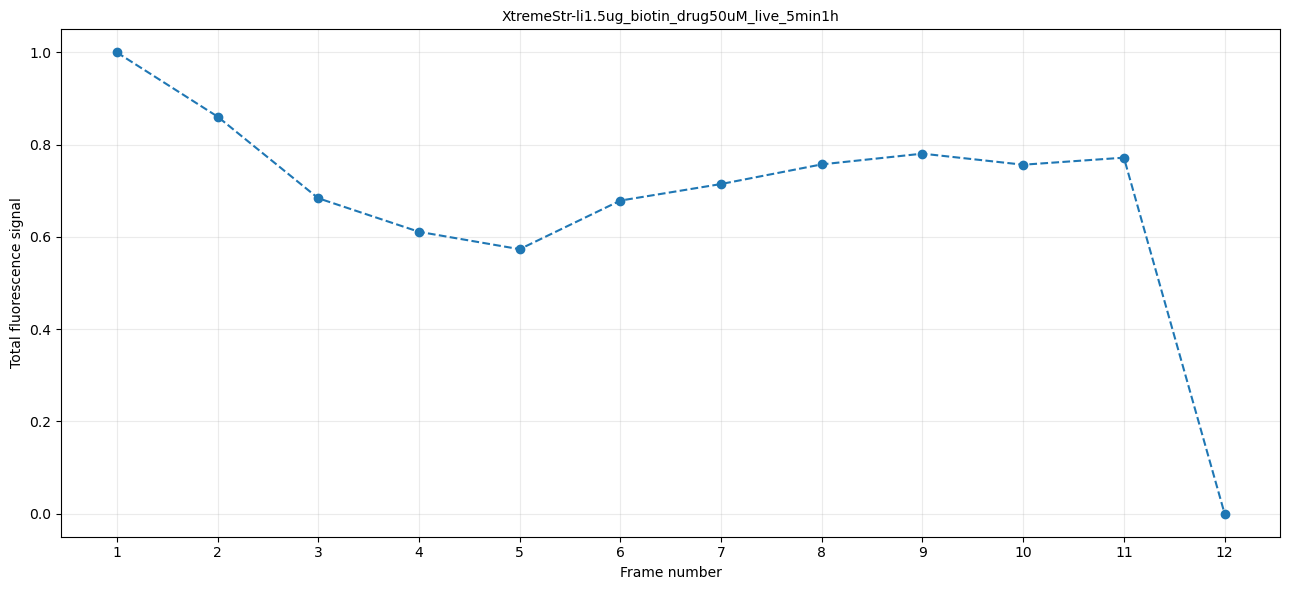

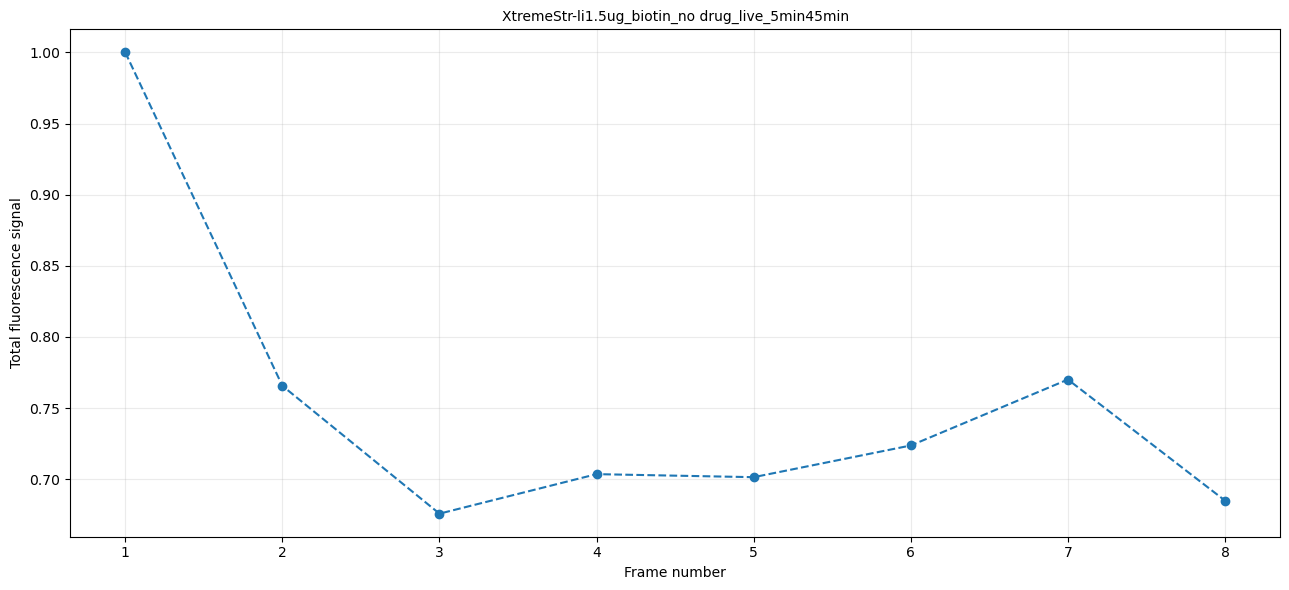

In [14]:
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, 'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                total_fluorescence.append(img_gray.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function


def histogrammer(video1, i): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames. 
    name = os.path.split(video_folders[i]) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1
    
    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.
    
    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10) #name[1] as my first index will be my path, second index is filename
    plt.tight_layout()
    filename = f'Graph for {name[1]}.jpg'
    plt.savefig(filename, dpi = 300) #added saving of plots!
    plt.show() #visualisation purposes only, for the output
    

#calling of the functions to do all the dirty work
for i, folder in enumerate(video_folders): #for index inside folder, count the number of folders inside the path video_folders
    video1 = extract_fluorescenceData(folder) #isolate the single videos, split into frames, change to grayscale, give add sum(fluorescence) per frame and save as video1
    all_video_values.append(video1) #append numpy total_fluorescence of this video from each iteration into all_video_values. Placed here instead of extract_fluorescenceData function if not next time i call it, it will append junk
    histogrammer(video1, i) #store the list of fluorescence signals as video1 and plot histogram

In [3]:
print(len(all_video_values))
print(all_video_values)
print(all_video_values[0][0], all_video_values[0][-1])
test = all_video_values[0][0] - all_video_values[0][-1]
print(test) #my shit works bro

7
[[22815.27228392157, 16526.16795960784, 13613.197476470588, 12592.679469803925, 13106.450968627454, 11860.151698823529, 9837.952113333338, 8780.41079137255, 7690.177448627452, 6506.539834901962], [35375.29842901961, 26051.15795137255, 22849.350591372553, 21302.589696078438, 22223.43023882353, 21172.410541960788, 20032.43291843138, 18274.79077176472, 17855.88923490196, 17758.80444509804], [42346.751834901974, 38215.691858431375, 36023.14272666668, 34289.95419960784, 32168.457314509807, 29311.66277490196, 27564.163793333322, 26494.8457545098, 39248.67636000001, 39204.90780156863], [22714.211033333333, 22456.174696470596, 21421.917971372557, 21212.09589176471, 20531.358345098044, 19795.16638470587, 19688.19378, 19393.43749686276, 19476.27661058824, 19544.732102745114, 17968.79300078432, 17541.83949490196, 16559.34277607843], [10732.908614901962, 12777.952719607845, 11284.83640705882, 9453.24462078432, 7932.983253333336, 7086.847475686276, 8013.87110745098, 7360.394826274509, 6459.294633

In [69]:
#mid testing. Want to create a function to loop through all the lists inside the list and minus last element with first in each list.
#shits broken af

def rate_change(testing):
    rate_changes = []
    for i in range(1, len(all_video_values)):
        rate_change = all_video_values[i][0] - all_video_values[i][-1]/ len(all_video_values)
    rate_changes.append(rate_change)
    return(rate_changes)


rate_change(all_video_values)


[20357.715840672266]

In [4]:
def rate_change(all_video_values):
    rate_change = []
    for i in all_video_values:
        rate_change = (all_video_values[-1] - all_video_values[0]) / len(video_values) #cannot run because all the lists differeng lengths
        rate_change.append(rate_change)
        print(rate_change)

rate_change(all_video_values)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

# For optimisation

#Definitely need to change this. Just used this to get over the initial hurdle
def extract_frames(video_path, frame_rate=13, output_dir="frames"):
  """Extracts frames from a video file and saves them with unique names.

  Args:
    video_path: The path to the video file.
    frame_rate: The desired frame rate for the extracted frames.
    output_dir: The directory to save the extracted frames.

  Returns:
    A list of extracted frames.
  """

  cap = cv2.VideoCapture(video_path)

  frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_interval = frame_count // frame_rate

  frames = []
  for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
      break
    if i % frame_interval == 0:
      frames.append(frame)

  #Create the output directory if it doesn't exist
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  #Save the extracted frames with unique names
  for i, frame in enumerate(frames, start = 1): #indicate starting no.
    filename = f"LipoKDEL1ug_biotin_no drug_live_5min1h_frame_{i:02d}.jpg"  #0 refers to adding leading zeros if needed, and 2 specifies the minimum character in the number which is 2. single digit no. will have leading zeros added to it.
    total_fluorescence.append(img.sum())
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, frame)

  return frames

#Extract frames from the video file
current_directory = os.getcwd()
video_path = os.path.join(current_directory, "LipoKDEL1ug_biotin_drug25uM_live_5min1h.avi")
frames = extract_frames(video_path)

print(f"Extracted {len(frames)} frames.")

In [3]:
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, 'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                print(f'{type(img_gray)=}', 
                      f'{img_gray.shape=}', #dimension of image, 1D array.
                      f'{img_gray.min()=}', #tells us the dimmest pixel, 0, background noise
                      f'{img_gray.max()=}', #brightest pixel value, 255 as we converted to gray_scale
                      f'{img_gray.sum()=}', #sums all the overall brightness of pixels in the image
                      sep='\n')
                # threshold = threshold_yen(img_gray)
                # img_binarised = img_gray < threshold
                print(f'{threshold_otsu(img_gray)=}') #0.240234375
                print(f'{threshold_yen(img_gray)=}') #0.080078125

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function
    return img_binarised

for i, folder in enumerate(video_folders): #for index inside folder, count the number of folders inside the path video_folders
    video1 = extract_fluorescenceData(folder) #isolate the single videos, split into frames, change to grayscale, give add sum(fluorescence) per frame and save as video1

type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(986, 986)
img_gray.min()=0.0
img_gray.max()=1.0
img_gray.sum()=22815.27228392157
threshold_otsu(img_gray)=0.240234375
threshold_yen(img_gray)=0.080078125
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(986, 986)
img_gray.min()=0.0
img_gray.max()=1.0
img_gray.sum()=16526.16795960784
threshold_otsu(img_gray)=0.310546875
threshold_yen(img_gray)=0.087890625
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(986, 986)
img_gray.min()=0.0
img_gray.max()=1.0
img_gray.sum()=13613.197476470588
threshold_otsu(img_gray)=0.322265625
threshold_yen(img_gray)=0.083984375
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(986, 986)
img_gray.min()=0.0
img_gray.max()=1.0
img_gray.sum()=12592.679469803925
threshold_otsu(img_gray)=0.322265625
threshold_yen(img_gray)=0.087890625
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(986, 986)
img_gray.min()=0.0
img_gray.max()=1.0
img_gray.sum()=13106.450968627454
threshold_otsu(img_gray)=

C:\Users\austi\miniconda3\Lib\site-packages\skimage\filters\thresholding.py:466: RuntimeWarning: divide by zero encountered in reciprocal
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
C:\Users\austi\miniconda3\Lib\site-packages\skimage\filters\thresholding.py:466: RuntimeWarning: invalid value encountered in multiply
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


threshold_otsu(img_gray)=0.15879985064338237
threshold_yen(img_gray)=0.2923698184742647
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(1024, 1024)
img_gray.min()=0.0
img_gray.max()=0.7546129411764706
img_gray.sum()=15877.904559607838
threshold_otsu(img_gray)=0.16654543428308824
threshold_yen(img_gray)=0.26381975873161767
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(1024, 1024)
img_gray.min()=0.0
img_gray.max()=0.745754117647059
img_gray.sum()=15829.785640784317
threshold_otsu(img_gray)=0.17915577435661767
threshold_yen(img_gray)=0.24907022288602948
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(1024, 1024)
img_gray.min()=0.0
img_gray.max()=0.7608066666666666
img_gray.sum()=16332.38124313725
threshold_otsu(img_gray)=0.20951902343749998
threshold_yen(img_gray)=0.23626613281249997
type(img_gray)=<class 'numpy.ndarray'>
img_gray.shape=(1024, 1024)
img_gray.min()=0.0
img_gray.max()=0.7742466666666666
img_gray.sum()=17378.133945098038
threshold_otsu(img_gray)=0.2192

In [19]:

print(f'{type(img_gray)=}', 
      f'{img_gray.shape=}', #dimension of image, 1D array.
      f'{img_gray.min()=}', #tells us the dimmest pixel, 0, background noise
      f'{img_gray.max()=}', #brightest pixel value, 255 as we converted to gray_scale
      f'{img_gray.sum()=}', #sums all the overall brightness of pixels in the image
      sep='\n')

NameError: name 'img_gray' is not defined

In [ ]:
img_data = img_data.flatten() #converting it to 1d array
plt.hist(img_data, bins = 256) #uint8 range is 0-255
plt.xlim(-10, 256) #change so can observe those at 0 better

ticks = [i for i in range(0, 256, 25)] #using list comprehension, start 0, end 256 in intervals of 25

plt.xticks(ticks) #setting x intervals
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.grid(alpha = 0.25)
plt.show()